In [1]:
import pandas as pd
df = pd.read_csv("Subject02/Subject02_Aufnahme000.csv", header = None)

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,32688,32224,32991,32609,32790,33048,37168,34610,27374,29068,29264,28408,31784,28133,29295,29244,33216,37140,34736
1,32744,32571,32935,32279,32863,33048,37168,34610,27374,29068,29264,28408,31784,28133,29295,29244,33216,37140,34736
2,32788,32934,32767,32624,32899,33048,37168,34610,27374,29068,29264,28408,31784,28133,29295,29244,33216,37140,34736
3,32828,33202,32587,32377,32783,33048,37168,34610,27374,29068,29264,28408,31784,28133,29295,29244,33216,37140,34736
4,32870,33269,32423,32954,32719,33048,37168,34610,27374,29068,29264,28408,31784,28133,29295,29244,33216,37140,34736


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6159 entries, 0 to 6158
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       6159 non-null   int64
 1   1       6159 non-null   int64
 2   2       6159 non-null   int64
 3   3       6159 non-null   int64
 4   4       6159 non-null   int64
 5   5       6159 non-null   int64
 6   6       6159 non-null   int64
 7   7       6159 non-null   int64
 8   8       6159 non-null   int64
 9   9       6159 non-null   int64
 10  10      6159 non-null   int64
 11  11      6159 non-null   int64
 12  12      6159 non-null   int64
 13  13      6159 non-null   int64
 14  14      6159 non-null   int64
 15  15      6159 non-null   int64
 16  16      6159 non-null   int64
 17  17      6159 non-null   int64
 18  18      6159 non-null   int64
dtypes: int64(19)
memory usage: 914.4 KB


In [6]:
train_labels["Label"].value_counts()

curve-left-spin-Rfirst     320
curve-right-spin-Lfirst    301
v-cut-left-Lfirst          300
run                        300
v-cut-right-Lfirst         300
walk                       300
curve-right-spin-Rfirst    300
curve-left-step            299
curve-right-step           295
sit-to-stand               289
sit                        289
stand-to-sit               289
stand                      289
lateral-shuffle-left       282
v-cut-left-Rfirst          280
curve-left-spin-Lfirst     280
v-cut-right-Rfirst         280
jump-two-leg               280
jump-one-leg               279
stair-down                 278
stair-up                   278
lateral-shuffle-right      277
lay                         16
Name: Label, dtype: int64

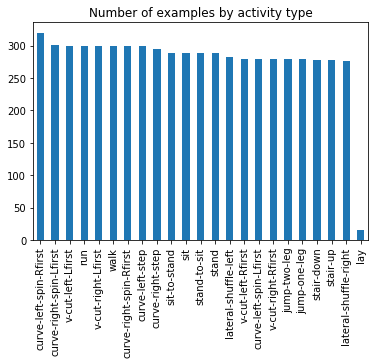

In [10]:
#visualize data
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

#check if we have roughly equal data for all activities
train_labels["Label"].value_counts().plot(kind="bar", title="Number of examples by activity type")

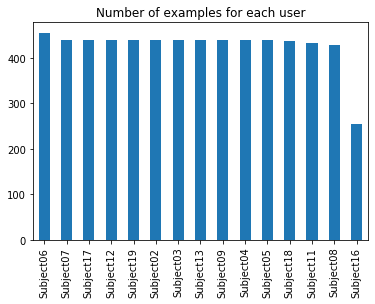

In [11]:
#check if we have roughly equal data for all users as we need to make a train-validation split of 80-20 
train_labels["Subject"].value_counts().plot(kind="bar", title="Number of examples for each user")


In [19]:
#We observed that a mislabelled activity "lay" is also included in our dataset. We must get rid of those rows as they don't
#contribute to our project
train_labels_lay = train_labels[train_labels["Label"]=="lay"]

print(train_labels_lay.shape)
train_labels_lay

(16, 3)


,Subject,Datafile,Label
1782,Subject06,Subject06/Subject06_Aufnahme026.csv,lay
1806,Subject06,Subject06/Subject06_Aufnahme050.csv,lay
1822,Subject06,Subject06/Subject06_Aufnahme066.csv,lay
1829,Subject06,Subject06/Subject06_Aufnahme073.csv,lay
1953,Subject06,Subject06/Subject06_Aufnahme197.csv,lay
1963,Subject06,Subject06/Subject06_Aufnahme207.csv,lay
1969,Subject06,Subject06/Subject06_Aufnahme213.csv,lay
1979,Subject06,Subject06/Subject06_Aufnahme223.csv,lay
1985,Subject06,Subject06/Subject06_Aufnahme229.csv,lay
2080,Subject06,Subject06/Subject06_Aufnahme324.csv,lay


In [21]:
train_labels_lay.index

Int64Index([1782, 1806, 1822, 1829, 1953, 1963, 1969, 1979, 1985, 2080, 2088,
            2091, 2106, 2108, 2128, 2134],
           dtype='int64')

In [24]:
train_labels = train_labels.drop(train_labels_lay.index, axis=0)

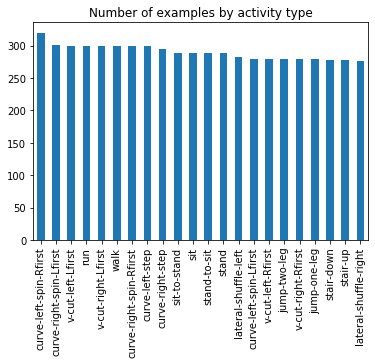

In [25]:
#check if we have roughly equal data for all activities
train_labels["Label"].value_counts().plot(kind="bar", title="Number of examples by activity type")

In [27]:
train_labels.groupby(["Subject","Label"]).count()

Datafile
Subject   Label                            
Subject02 curve-left-spin-Lfirst         20
          curve-left-spin-Rfirst         20
          curve-left-step                20
          curve-right-spin-Lfirst        20
          curve-right-spin-Rfirst        20
...                                     ...
Subject19 v-cut-left-Lfirst              20
          v-cut-left-Rfirst              20
          v-cut-right-Lfirst             20
          v-cut-right-Rfirst             20
          walk                           20

[325 rows x 1 columns]

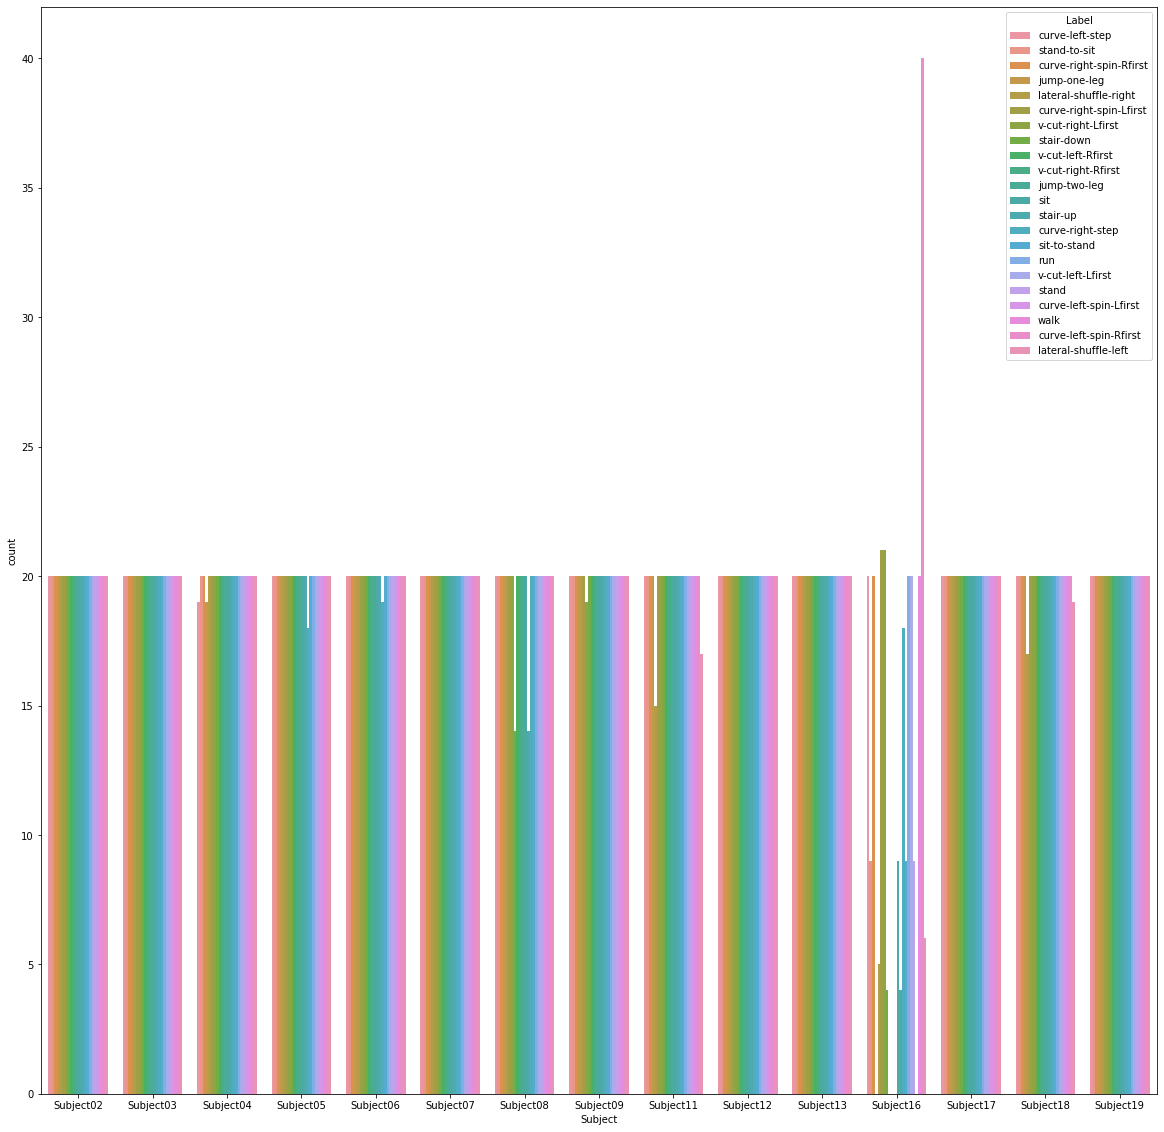

In [32]:
#visualizing
import seaborn as sns

plt.figure(figsize=(20, 20))

sns.countplot(data=train_labels, x="Subject", hue="Label")

In [36]:
#lets make test and train split. Since Subject 6 has unevenly distributed labels, 
#lets put it in test set and the rest in training set.

test_subjects = ["Subject16", "Subject18", "Subject19"]

y_train = train_labels[~train_labels.Subject.isin(test_subjects)]

In [38]:
y_train["Subject"].value_counts()

Subject07    440
Subject17    440
Subject12    440
Subject02    440
Subject03    440
Subject13    440
Subject09    439
Subject06    439
Subject04    438
Subject05    438
Subject11    432
Subject08    428
Name: Subject, dtype: int64

In [ ]:
# load files

def load_subject_files(subject):
    for i in range(440):
        num = f"{i:03d}"
        file = subject+"/"+subject+"_Aufnahme"+num+".csv"
        
        df = pd.read_csv(file)
        
        extract_time_features()
         

In [51]:
for i in range(0,440,49):
    num = f"{i:03d}"
    file = "subject02"+"/"+"subject02"+"_Aufnahme"+num+".csv"
    print(file)

subject02/subject02_Aufnahme000.csv
subject02/subject02_Aufnahme049.csv
subject02/subject02_Aufnahme098.csv
subject02/subject02_Aufnahme147.csv
subject02/subject02_Aufnahme196.csv
subject02/subject02_Aufnahme245.csv
subject02/subject02_Aufnahme294.csv
subject02/subject02_Aufnahme343.csv
subject02/subject02_Aufnahme392.csv
